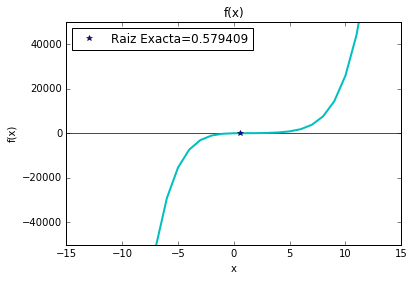


Biseccion:

╒═════════════╤═══════════════════╤═══════════════════╕
│   Biseccion │ Error PV          │ Eaprox            │
╞═════════════╪═══════════════════╪═══════════════════╡
│    0.75     │ 29.4422420087 %   │ ----- %           │
├─────────────┼───────────────────┼───────────────────┤
│    0.625    │ 7.86853500722 %   │ 20.0 %            │
├─────────────┼───────────────────┼───────────────────┤
│    0.5625   │ 2.9183184935 %    │ 11.1111111111 %   │
├─────────────┼───────────────────┼───────────────────┤
│    0.59375  │ 2.47510825686 %   │ 5.26315789474 %   │
├─────────────┼───────────────────┼───────────────────┤
│    0.578125 │ 0.221605118319 %  │ 2.7027027027 %    │
├─────────────┼───────────────────┼───────────────────┤
│    0.585938 │ 1.12675156927 %   │ 1.33333333333 %   │
├─────────────┼───────────────────┼───────────────────┤
│    0.582031 │ 0.452573225476 %  │ 0.671140939597 %  │
├─────────────┼───────────────────┼───────────────────┤
│    0.580078 │ 0.115484053579 %  │

In [34]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline 

raices=[]
ErrorA=[]
tabla1=[]
valores=[]
array=[]
raices2=[]
ErrorA2=[]
tabla2=[]
fA=1.0
f1=1.0
f2=1.0
f3=1.0
xl=0.5
xu=1.0
xr=0.0
xl2=0.5
xu2=1.0
xr2=0.0
a=0
Es=0.1
Es2=0.02
xVerd=0.579409
cont=-15

while(cont<=15):
    fxG=-25+82*cont-90*(math.pow(cont,2))+44*(math.pow(cont,3))-8*(math.pow(cont,4))+0.7*(math.pow(cont,5))
    valores.append(cont)
    array.append(fxG)
    cont+=1
    
def metodo1(x):
    fx=-25+82*x-90*(math.pow(x,2))+44*(math.pow(x,3))-8*(math.pow(x,4))+0.7*(math.pow(x,5))
    return fx

while 1:
    xr=(xl+xu)/2
    raices.append(xr)
    fA=metodo1(xl)
    fB=metodo1(xr)
    erpv=math.fabs(((xVerd-xr)/xVerd)*100)
    if(a==0):
        ErrorA.append("-----")
        eaprx=100
    else:
        j=a-1
        eaprx=math.fabs(((raices[a]-raices[j])/raices[a])*100)
        ErrorA.append(eaprx)
    tabla1.append([xr,  str(erpv)+" %", str( ErrorA[a])+" %"])
    if ((fA*fB)<0):
        xu=xr
    if((fA*fB)>0):
         xl=xr
    a+=1
    if(eaprx<Es):
        break
b=0
while 1:
    f1=metodo1(xl2)
    f2=metodo1(xu2)
    xr2=xu2-(f2*(xl2-xu2))/(f1-f2)
    raices2.append(xr2)
    f3=metodo1(xr2)
    erpv2=math.fabs(((xVerd-xr2)/xVerd)*100)
    if(b==0):
        ErrorA2.append("-----")
        eaprx2=100
    else:
        k=b-1
        eaprx2=math.fabs(((raices2[b]-raices2[k])/raices2[b])*100)
        ErrorA2.append(eaprx2)
    tabla2.append([xr2, str(erpv2)+" %", str( ErrorA2[b])+" %"])
    if ((f1*f3)<0):
        xu2=xr2
    if((f1*f3)>0):
         xl2=xr2
    if(eaprx2<Es2):
        break    
    b+=1
    
plt.title("f(x)")
plt.axis([-15, 15, -50000, 50000])
plt.ylabel('f(x)')
plt.xlabel('x')
plt.axhline(0, color="red")
plt.plot(valores, array, 'c-', linewidth=2)
plt.plot(xVerd,0, '*', label='Raiz Exacta=0.579409')
plt.legend(loc = 'upper left', numpoints = 1)
plt.show()

print "\nBiseccion:\n"
print tabulate(tabla1, headers=["Biseccion", "Error PV", "Eaprox"], tablefmt="fancy_grid")
print "\nFalsa posicion:\n"
print tabulate(tabla2, headers=["Falsa Posicion", "Error PV", "Eaprox"], tablefmt="fancy_grid")